<div style="color:red">Unfortunately the data at the first link changed</div>

# Calculating Pets per Capita

In this example, we will calculate the pets per capita among selected countries.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting pet populations
PetSecure.com has some charts with total number of pets in various countries. We'll use Pandas' *read_html* function to grab the data. We don't need the first two rows, so we skip those. The numbers have commas in them, so we'll tell Pandas to convert those. Finally, we'll use the country name as the row index.

In [23]:
dframes = pd.read_html("https://www.petsecure.com.au/pet-care/a-guide-to-worldwide-pet-ownership/", 
                       thousands=",", skiprows=1, index_col=0, header=None, names=['Country', "# Pets"])

dogs = dframes[0]  # dogs
dogs

TypeError: read_html() got an unexpected keyword argument 'names'

## Plotting total pet ownership
First, we'll just plot total ownership. We don't yet have the data to calculate the _per capita_ ownership. 

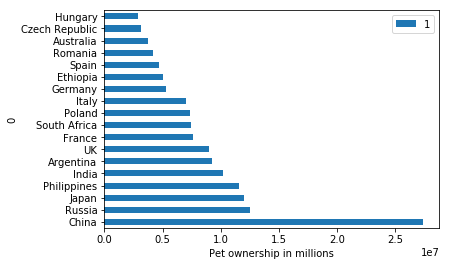

In [19]:
ax = dogs.plot(kind="barh")
ax.set_xlabel("Pet ownership in millions")

## Getting human populations
Now we need to get the human populations for the countries.*WorldMeters.info* has this information. 

In [13]:
pops = pd.read_html("http://www.worldometers.info/world-population/population-by-country/", index_col=1)[0]
pops

,#,Population (2018),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,,
China,1,1415045928,0.39 %,5528531,151,9388211,-339690.0,1.6,37,58 %,18.54 %
India,2,1354051854,1.11 %,14871727,455,2973190,-515643.0,2.4,27,32 %,17.74 %
U.S.,3,326766748,0.71 %,2307285,36,9147420,900000.0,1.9,38,83 %,4.28 %
Indonesia,4,266794980,1.06 %,2803601,147,1811570,-167000.0,2.5,28,54 %,3.50 %
Brazil,5,210867954,0.75 %,1579676,25,8358140,3185.0,1.8,31,84 %,2.76 %


We want to grab the human populations, but only for the countries for which we have dog populations, so we grab the countries from our dog population dataframe.

In [14]:
country_list = dogs.index.values
country_list

array(['China', 'Russia', 'Japan', 'Philippines', 'India', 'Argentina',
       'UK', 'France', 'South Africa', 'Poland', 'Italy', 'Germany',
       'Ethiopia', 'Spain', 'Romania', 'Australia', 'Czech Republic',
       'Hungary'], dtype=object)

We can concatentate the two dataframes into one, using only the countries we need. We want to concatenate columns, not row, so we use axis *1*. The default is *0*, which will concatenate rows.

We also have to fix up two countries where the country labels don't match. 

In [15]:
data = pd.concat([dogs, pops.loc[country_list].iloc[:,1]], axis=1)
data.loc['USA','Population (2018)'] = pops.loc['U.S.','Population (2018)']
data.loc['UK','Population (2018)'] = pops.loc['U.K.','Population (2018)']
data.columns = ["Dog Population", "Human Population"]
data

,Dog Population,Human Population
China,27400000.0,1.415046e+09
Russia,12520000.0,1.439647e+08
Japan,12000000.0,1.271853e+08
Philippines,11600000.0,1.065121e+08
India,10200000.0,1.354052e+09
Argentina,9200000.0,4.468886e+07
UK,9000000.0,6.657350e+07
France,7570000.0,6.523327e+07
South Africa,7400000.0,5.739842e+07
Poland,7311000.0,3.810483e+07


Now we add the new column with the per capita result. The magic *.eval()* function

In [16]:
data['Dogs Per Capita'] = pd.eval(data['Dog Population'] / data['Human Population'])
data.sort_values(by="Dogs Per Capita", ascending=False, inplace=True)
data

UndefinedVariableError: name 'nan' is not defined

In [ ]:
p = data['Dogs Per Capita'].plot(kind="barh")
p